In [4]:
import torch
import matplotlib.pyplot as plt
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [5]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

torch.backends.cudnn.enabled = False
torch.manual_seed(1)

In [6]:
trainset = torchvision.datasets.MNIST('./data/', train=True, download=True,
                              transform=torchvision.transforms.Compose([
                              torchvision.transforms.ToTensor(),
                              torchvision.transforms.Normalize(
                              (0.1307,), (0.3081,))]))
testset = torchvision.datasets.MNIST('./data/', train=False, download=True,
                              transform=torchvision.transforms.Compose([
                              torchvision.transforms.ToTensor(),
                              torchvision.transforms.Normalize(
                              (0.1307,), (0.3081,))]))

train_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size_test, shuffle=True)

In [15]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

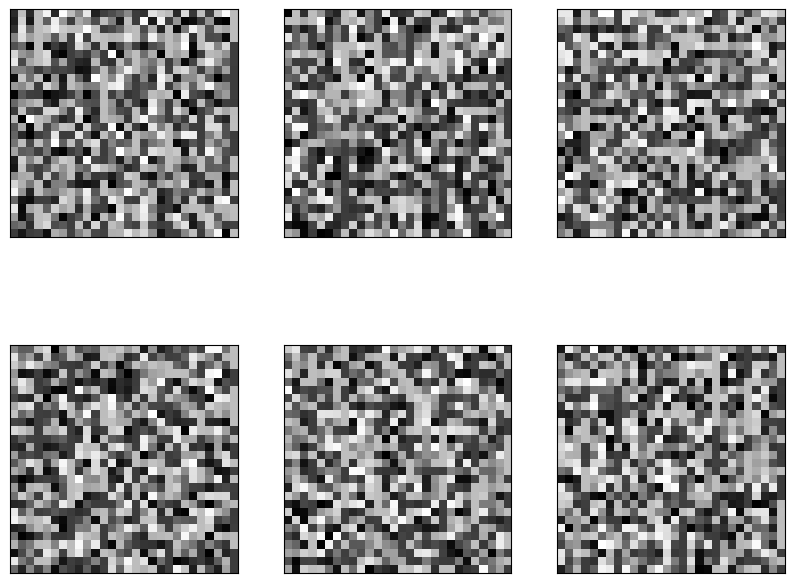

In [16]:
fig = plt.figure(figsize=(10, 8))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])

In [14]:
#Adding gaussian noise to the training set
trainset_noise = trainset.data + torch.randn(trainset.data.size()) * 0.1
testset_noise = testset.data + torch.randn(testset.data.size()) * 0.1

In [ ]:
train_loader = torch.utils.data.DataLoader(testset,trainset_noise, batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(trainset,testset_noise, batch_size=batch_size_test, shuffle=True)

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv3 = nn.Conv2d(20, 50, kernel_size=5)
        self.fc1 = nn.Linear(320, 1000)
        self.fc2 = nn.Linear(1000, 784)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)